In [447]:
%pylab inline  

Populating the interactive namespace from numpy and matplotlib


In [448]:
import pandas as pd
import sklearn as skl
import scipy
import sys
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pylab as pl
import seaborn as sns
from datetime import date
from sklearn.neighbors import KNeighborsRegressor
from sklearn import grid_search
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn import ensemble

In [449]:
data = pd.read_csv('train.csv', parse_dates=["date"])

In [450]:
print("Amount absent values 'ftemp': %.3f" % (len(data[data.ftemp == '-']) / len(data) * 100), '%')
data.head()

Amount absent values 'ftemp': 25.138 %


,date,hour,holiday,workingday,weekday,weather_type,temp,ftemp,humidity,wind_speed,casual,subscribed,usage
0,2011-01-03,0,0,1,1,1,0.22,0.19699999999999998,0.44,0.3582,0,15,15
1,2011-01-03,1,0,1,1,1,0.20,0.1667,0.44,0.4179,0,6,6
2,2011-01-03,4,0,1,1,1,0.16,0.1364,0.47,0.3881,0,3,3
3,2011-01-03,5,0,1,1,1,0.16,0.1364,0.47,0.2836,0,9,9
4,2011-01-03,6,0,1,1,1,0.14,-,0.50,0.3881,0,90,90


In [451]:
known_ftemp = data[data.ftemp != '-']
medium_diff = np.mean(known_ftemp.temp - known_ftemp.ftemp.astype(float))
medium_diff

0.02095721286370588

In [452]:
data.loc[data.ftemp == '-', 'ftemp'] = (data.temp - medium_diff).astype(np.float)
data.ftemp = data.ftemp.astype(float)

In [453]:
date_scaler = MinMaxScaler()
data.date = date_scaler.fit_transform(data.date.astype(np.int64)[:,np.newaxis])

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [454]:
data.dtypes

date            float64
hour              int64
holiday           int64
workingday        int64
weekday           int64
weather_type      int64
temp            float64
ftemp           float64
humidity        float64
wind_speed      float64
casual            int64
subscribed        int64
usage             int64
dtype: object

In [455]:
data.corr()

,date,hour,holiday,workingday,weekday,weather_type,temp,ftemp,humidity,wind_speed,casual,subscribed,usage
date,1.000000,-0.008203,0.057832,-0.010183,0.001374,-0.023054,0.131941,0.134037,-0.001135,-0.057246,0.007197,0.278399,0.060117
hour,-0.008203,1.000000,0.000468,0.002209,-0.003679,-0.029682,0.131916,0.129875,-0.271771,0.127540,0.028011,0.371302,0.098023
holiday,0.057832,0.000468,1.000000,-0.247877,-0.094536,-0.013434,-0.008131,-0.009728,0.006655,-0.019608,0.002130,-0.041417,-0.005842
workingday,-0.010183,0.002209,-0.247877,1.000000,0.036898,0.057356,0.053103,0.054914,0.025730,-0.004804,-0.015372,0.134013,0.010684
weekday,0.001374,-0.003679,-0.094536,0.036898,1.000000,0.000816,0.000837,-0.004317,-0.043147,0.025951,-0.000206,0.015390,0.002738
weather_type,-0.023054,-0.029682,-0.013434,0.057356,0.000816,1.000000,-0.083150,-0.087013,0.417010,0.044447,-0.015864,-0.131915,-0.040555
temp,0.131941,0.131916,-0.008131,0.053103,0.000837,-0.083150,1.000000,0.993252,-0.032506,-0.035742,0.040763,0.332923,0.103055
ftemp,0.134037,0.129875,-0.009728,0.054914,-0.004317,-0.087013,0.993252,1.000000,-0.022837,-0.064100,0.040860,0.332542,0.103076
humidity,-0.001135,-0.271771,0.006655,0.025730,-0.043147,0.417010,-0.032506,-0.022837,1.000000,-0.282958,-0.036357,-0.268173,-0.086425
wind_speed,-0.057246,0.127540,-0.019608,-0.004804,0.025951,0.044447,-0.035742,-0.064100,-0.282958,1.000000,0.010544,0.080219,0.025531


In [456]:
# data.loc[(data["weekday"] == 5) | (data["weekday"] == 6), "holiday"] = 1

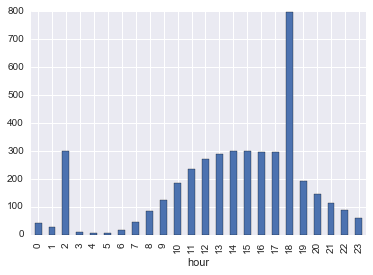

In [457]:
data.pivot_table(values='casual', index='hour', aggfunc=np.mean).plot.bar()

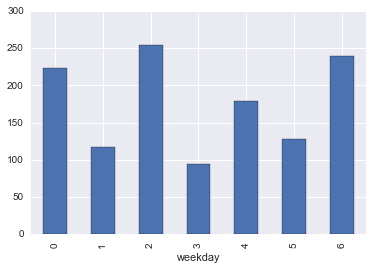

In [458]:
data.pivot_table(values='casual', index='weekday', aggfunc=np.mean).plot.bar()

In [459]:
data_subscribed = data.copy()
data_casual = data.copy()

In [460]:
data_subscribed.head()

,date,hour,holiday,workingday,weekday,weather_type,temp,ftemp,humidity,wind_speed,casual,subscribed,usage
0,0.0,0,0,1,1,1,0.22,0.197000,0.44,0.3582,0,15,15
1,0.0,1,0,1,1,1,0.20,0.166700,0.44,0.4179,0,6,6
2,0.0,4,0,1,1,1,0.16,0.136400,0.47,0.3881,0,3,3
3,0.0,5,0,1,1,1,0.16,0.136400,0.47,0.2836,0,9,9
4,0.0,6,0,1,1,1,0.14,0.119043,0.50,0.3881,0,90,90


3

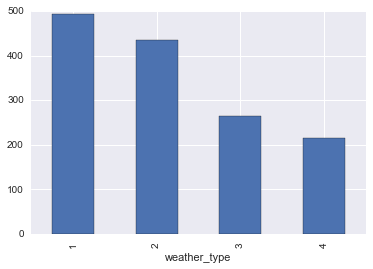

In [461]:
data_subscribed.pivot_table(values='subscribed', index='weather_type', aggfunc=np.mean).plot.bar()
len(data[data.weather_type == 4])

In [462]:
size_all= len(data)
size_tm = len(data[(data.temp < 0.1) & (data.temp > 0.9)])
size_tm / size_all
# data = data[(data.temp > 0.1) & (data.temp < 0.9)]

0.0

In [463]:
len(data_casual[data_casual.casual > 1200])

28

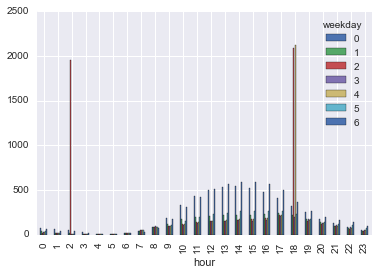

In [464]:
data_casual.pivot_table(values='casual', index='hour', columns='weekday', aggfunc=np.mean).plot.bar()

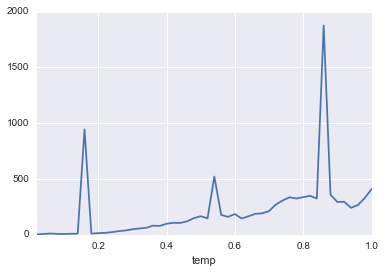

In [465]:
data_casual.pivot_table(values='casual', index='temp', aggfunc=np.mean).plot()

# Regression for subscribed

In [364]:
# data_test_set = data_subscribed

# data_test_set = data_test_set.drop(['casual', 'subscribed', 'usage'], 1)
# X_train, X_test, y_train, y_test = train_test_split(data_test_set, data_subscribed.subscribed)

# y_train_subsribed = y_train
# y_test_subscribed = y_test

# parameters = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3]}]
# clf_grid = grid_search.GridSearchCV(KNeighborsRegressor(), parameters, n_jobs=-1)
# clf_grid.fit(X_train, y_train_subsribed)
# predictions = clf_grid.predict(X_test)

# print("Opitimal neigbour: ", clf_grid.best_estimator_.n_neighbors)
# print("Opitimal p: ", clf_grid.best_estimator_.p)
# print("Opitimal weights: ", clf_grid.best_estimator_.weights)
# print("Best score: ", clf_grid.best_score_)

In [466]:
data_subscribed = data.copy()

In [467]:
data_subscribed = data_subscribed[data_subscribed.casual < 1250]
# data_subscribed = data_subscribed[data_subscribed.usage < 10000]
len(data_subscribed)

13065

In [468]:
data_test_set = data_subscribed

data_test_set = data_test_set.drop(['casual', 'subscribed', 'usage'], 1)
X_train, X_test, y_train, y_test = train_test_split(data_test_set, data_subscribed.subscribed)

y_train_subsribed = y_train
y_test_subscribed = y_test

subscribed_regression1 = ensemble.RandomForestRegressor(n_estimators=120)
subscribed_regression1.fit(X_train, y_train_subsribed)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=120, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [469]:
y_predicted1 = subscribed_regression1.predict(X_test)
print("Error for subscribed: ", mean_absolute_error(y_test_subscribed, y_predicted1))
print("R2: ", r2_score(y_test_subscribed, y_predicted1))
print("Negative el: ", len(y_predicted1[y_predicted1 < 0]))

Error for subscribed:  62.0707223753
R2:  0.949771660707
Negative el:  0


In [162]:
for i in range(10, 200, 10):
    scores = cross_val_score(ensemble.RandomForestRegressor(n_estimators=i),\
                             data_subscribed.drop(['casual', 'subscribed', 'usage'], 1),\
                             data_subscribed.subscribed, scoring='r2',n_jobs=-1,cv=KFold(n_splits=10, shuffle=True))
    print("Estimators: ", i)
    print("R2: ", scores.mean())

Estimators:  10
R2:  0.941868573879
Estimators:  20
R2:  0.945020662899
Estimators:  30
R2:  0.944573362566
Estimators:  40
R2:  0.944896955597
Estimators:  50
R2:  0.945074513474
Estimators:  60
R2:  0.946752078739
Estimators:  70
R2:  0.946107018295
Estimators:  80
R2:  0.947034456148
Estimators:  90
R2:  0.945750668343
Estimators:  100
R2:  0.946400241238
Estimators:  110
R2:  0.945420756187
Estimators:  120
R2:  0.947187682779
Estimators:  130
R2:  0.947058062643
Estimators:  140
R2:  0.946695845062
Estimators:  150
R2:  0.947097411233
Estimators:  160
R2:  0.946287285948
Estimators:  170
R2:  0.946418279964
Estimators:  180
R2:  0.945705556938
Estimators:  190
R2:  0.945562565334


### Importance feature for subscribers:

In [155]:
importances = subscribed_regression1.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, data.columns[idx], importances[idx]))

Feature importances:
 1. feature 'hour ' (0.5573)
 2. feature 'date ' (0.1831)
 3. feature 'workingday' (0.1476)
 4. feature 'ftemp' (0.0316)
 5. feature 'humidity' (0.0242)
 6. feature 'temp ' (0.0197)
 7. feature 'weather_type' (0.0167)
 8. feature 'weekday' (0.0106)
 9. feature 'wind_speed' (0.0077)
10. feature 'holiday' (0.0014)


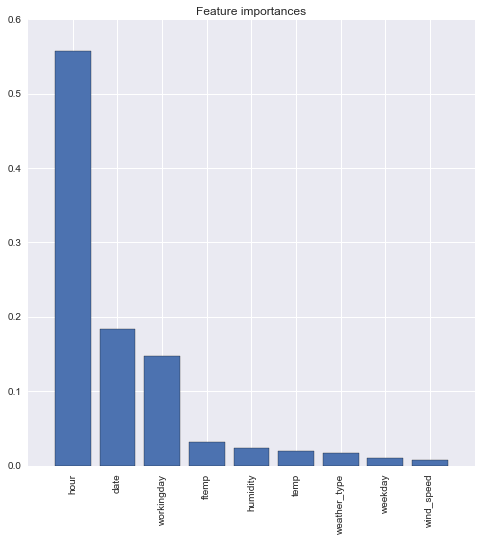

In [156]:
d_first = 9
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(data.columns)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

### Additional cleaning for casual

In [470]:
data_casual = data.copy()

In [471]:
data_casual = data_casual[data_casual.casual < 10000]

#### Delete outliers with value casual > 1200

In [472]:
data_casual = data_casual[data_casual.casual < 1250]

#### 1. Workind_day is True 

In [473]:
len(data_casual)

13065

In [474]:
data_casual = data_casual[~((data_casual.casual > 1000).values & (data_casual.workingday == 1).values)]

In [475]:
len(data_casual)

13064

#### 2. Weekday == 3

In [476]:
data_casual = data_casual[~((data_casual.casual > 800).values & (data_casual.weekday == 3).values)]

#### 3. Weather_type == 3

In [477]:
data_casual = data_casual[~((data_casual.casual > 800).values & (data_casual.weather_type == 3).values)]

#### WInd_speed > 0.85

In [478]:
data_casual = data_casual[~(data_casual.wind_speed >= 0.85).values]

In [479]:
len(data_subscribed[data_subscribed.usage > 10000])
data_subscribed = data.copy()
data_subscribed = data_subscribed[~(data_subscribed.usage > 10000).values]

In [480]:
len(data_casual)

13056

# Regression for casual

In [481]:
data_test_set = data_casual

data_test_set = data_test_set.drop(['casual', 'subscribed', 'usage'], 1)
X_train, X_test, y_train, y_test = train_test_split(data_test_set, data_casual.casual, test_size=0.1)

y_train_casual = y_train
y_test_casual = y_test

casual_regression2 = ensemble.RandomForestRegressor(n_estimators=170, random_state=11)
casual_regression2.fit(X_train, y_train_casual)

y_predicted2 = casual_regression2.predict(X_test)
    
print("Error for casual: ", mean_absolute_error(y_test_casual, y_predicted2))
print("R2: ", r2_score(y_test_casual, y_predicted2))
print("Negative el: ", len(y_predicted2[y_predicted2 < 0]))

Error for casual:  32.5468336186
R2:  0.922696068649
Negative el:  0


In [309]:
scores = cross_val_score(ensemble.RandomForestRegressor(n_estimators=170),\
                         data_casual.drop(['casual', 'subscribed', 'usage'], 1),\
                         data_casual.casual, scoring='r2',n_jobs=-1,cv=KFold(n_splits=10, shuffle=True))
print("R2: ", scores.mean())

R2:  0.911967621064


### Importance feature for casual:

In [330]:
importances = casual_regression2.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, data.columns[idx], importances[idx]))

Feature importances:
 1. feature 'hour ' (0.3834)
 2. feature 'workingday' (0.1890)
 3. feature 'ftemp' (0.1557)
 4. feature 'date ' (0.0848)
 5. feature 'temp ' (0.0830)
 6. feature 'humidity' (0.0576)
 7. feature 'wind_speed' (0.0182)
 8. feature 'weekday' (0.0154)
 9. feature 'weather_type' (0.0101)
10. feature 'holiday' (0.0027)


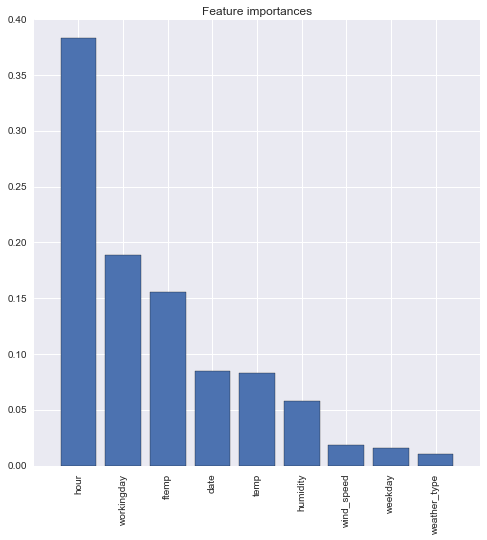

In [331]:
d_first = 9
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(data.columns)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

# Metrics

In [124]:
y_final = y_predicted1 + y_predicted2
a = np.array(y_test_casual) + np.array(y_test_subscribed)
np.mean(abs(a - y_final))

# Testing

In [482]:
test_data = pd.read_csv('test.csv', parse_dates=["date"])

test_data_scaler = MinMaxScaler()
test_data.date = test_data_scaler.fit_transform(test_data.date.astype(np.int64)[:,np.newaxis])
test_data.loc[test_data.ftemp == '-', 'ftemp'] = test_data.temp - medium_diff

data_index = test_data.Id.values
data_x = test_data.drop(['Id'], 1)

answers_subscribed = subscribed_regression1.predict(data_x)
answers_casual = casual_regression2.predict(data_x)
answers = answers_subscribed + answers_casual

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [438]:
# answers = answers.astype(int)

# Save to CSV

In [483]:
import csv
with open('submission.csv', 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(("Id", "Expected"))
        for i in range(0, len(data_x)):
            writer.writerow((data_index[i], answers[i]))

In [442]:
import csv
with open('submission_casual.csv', 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(("Id", "Expected"))
        for i in range(0, len(data_x)):
            answers_casual = answers_casual.astype(int)
            writer.writerow((data_index[i], answers_casual[i]))

In [443]:
import csv
with open('submission_subscribed.csv', 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(("Id", "Expected"))
        for i in range(0, len(data_x)):
            answers_subscribed = answers_subscribed.astype(int)
            writer.writerow((data_index[i], answers_subscribed[i]))